<a href="https://colab.research.google.com/github/schmuecker/machine-learning-course/blob/main/03%20svm/03.1%20cross%20validation/03.1_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Validation

## 1 a)

**Handschrift-Datensatz laden**

In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

**Merkmalsvektoren**

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
features_df = pd.DataFrame(digits.data)
features_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.000000,0.000000,0.000000,4.000000,15.000000,12.000000,13.000000,14.00

**Labels**

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
labels_df = pd.DataFrame(digits.target)
labels_df.describe()

,0
count,1797.000000
mean,4.490818
std,2.865304
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


**Sample images**

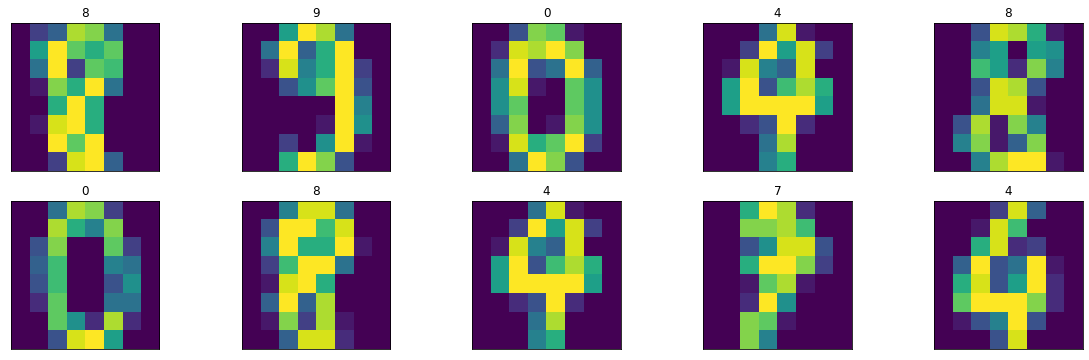

In [28]:
import matplotlib.pyplot as plt
import random

n_images = len(digits.data)
fig = plt.figure(figsize=(20, 6))

for idx in range(10):
  image_idx = random.randint(0, n_images)

  image = digits.data[image_idx]
  label = digits.target[image_idx]

  ax = fig.add_subplot(2, 5, idx + 1, xticks=[], yticks=[])
  ax.set_title(label)
  image_2d = np.reshape(image, (8, 8))
  ax.imshow(image_2d)

plt.show()

## 1 b)

**Split training and test set (75/25)**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)


**Traing SVM**

In [40]:
from sklearn import svm

clf = svm.SVC(gamma=0.015, C=1.0)
clf.fit(X_train, y_train)

print('Accuracy on training set:', clf.score(X_train, y_train))
print('Accuracy on test set:', clf.score(X_test, y_test))

# => Overfitting

Accuracy on training set: 1.0
Accuracy on test set: 0.4444444444444444


In [41]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)

print('Accuracy on training set:', clf.score(X_train, y_train))
print('Accuracy on test set:', clf.score(X_test, y_test))

# => Better fit

Accuracy on training set: 1.0
Accuracy on test set: 0.9911111111111112


**Alternative split**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=23452345)

In [46]:
from sklearn import svm

clf = svm.SVC(gamma=0.015, C=1.0)
clf.fit(X_train, y_train)

print('Accuracy on training set:', clf.score(X_train, y_train))
print('Accuracy on test set:', clf.score(X_test, y_test))

# => Same accuracy on training data. Accuracy is 0.08 higher on test set.

Accuracy on training set: 1.0
Accuracy on test set: 0.5244444444444445


In [47]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)

print('Accuracy on training set:', clf.score(X_train, y_train))
print('Accuracy on test set:', clf.score(X_test, y_test))

# => Same accuracy on training data. Accuracy is 0.004 higher on test set.

Accuracy on training set: 1.0
Accuracy on test set: 0.9955555555555555


## 2 a)

In [59]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=3, test_size=.25, random_state=0)

for counter, (train_index, test_index) in enumerate(rs.split(digits.data)):

  X_train = []
  y_train = []
  for idx in train_index:
    X_train.append(digits.data[idx])
    y_train.append(digits.target[idx])

  X_test = []
  y_test = []
  for idx in test_index:
    X_test.append(digits.data[idx])
    y_test.append(digits.target[idx])

  clf = svm.SVC(gamma=0.001, C=1.)
  clf.fit(X_train, y_train)

  print('\nSet no.', counter)
  print('Accuracy on training set:', clf.score(X_train, y_train))
  print('Accuracy on test set:', clf.score(X_test, y_test))


Set no. 0
Accuracy on training set: 0.9992576095025983
Accuracy on test set: 0.9955555555555555

Set no. 1
Accuracy on training set: 0.9985152190051967
Accuracy on test set: 0.9955555555555555

Set no. 2
Accuracy on training set: 0.9992576095025983
Accuracy on test set: 0.9933333333333333


## b)

In [75]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

clf = svm.SVC(gamma=0.001, C=1.)

acc = cross_val_score(clf, digits.data, digits.target, cv=10)
mean_acc = np.mean(acc)
std_acc = np.std(acc)

print('\n Accuracy:\n', acc)
print('\n Mean accuracy:', mean_acc)
print('\n Standard deviation:', std_acc)


 Accuracy:
 [0.95       1.         0.95       0.98333333 0.98888889 0.98888889
 0.99444444 0.99441341 0.96648045 0.96648045]

 Mean accuracy: 0.9782929857231533

 Standard deviation: 0.01766901739189916


## c)

In [111]:
C = 10.
gammas = np.logspace(-7, -1, 10)

scores_train_2d = []
scores_test_2d = []

for g in gammas:

  rs = ShuffleSplit(n_splits=5, train_size=500, test_size=500, random_state=0)

  scores_train = []
  scores_test = []

  for counter, (train_index, test_index) in enumerate(rs.split(digits.data)):

    X_train = []
    y_train = []
    for idx in train_index:
      X_train.append(digits.data[idx])
      y_train.append(digits.target[idx])

    X_test = []
    y_test = []
    for idx in test_index:
      X_test.append(digits.data[idx])
      y_test.append(digits.target[idx])

    clf = svm.SVC(gamma=g, C=C)
    clf.fit(X_train, y_train)

    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)

    scores_train.append(score_train)
    scores_test.append(score_test)

  scores_train_2d.append(scores_train)
  scores_test_2d.append(scores_test)
  # We have to group the values by the split number

print(scores_train_2d)
print(scores_test_2d)



[[0.128, 0.22, 0.122, 0.12, 0.12], [0.128, 0.22, 0.122, 0.172, 0.12], [0.88, 0.904, 0.9, 0.83, 0.872], [0.966, 0.962, 0.968, 0.962, 0.962], [0.99, 0.99, 0.99, 0.988, 0.994], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]
[[0.108, 0.184, 0.078, 0.08, 0.086], [0.108, 0.184, 0.078, 0.116, 0.088], [0.844, 0.882, 0.876, 0.768, 0.794], [0.946, 0.946, 0.954, 0.946, 0.922], [0.964, 0.972, 0.976, 0.97, 0.942], [0.978, 0.986, 0.982, 0.966, 0.962], [0.984, 0.986, 0.984, 0.98, 0.972], [0.886, 0.948, 0.916, 0.93, 0.926], [0.126, 0.17, 0.108, 0.104, 0.126], [0.108, 0.104, 0.078, 0.082, 0.086]]


1e-07 1.0
4.641588833612782e-07 1.0
2.1544346900318822e-06 1.0
1e-05 1.0
4.641588833612772e-05 1.0
0.00021544346900318823 1.0
0.001 1.0
0.004641588833612773 1.0
0.021544346900318822 1.0
0.1 1.0


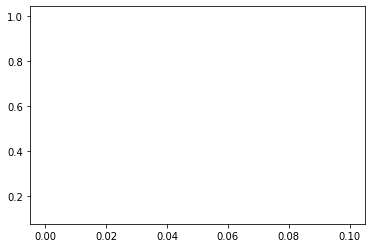

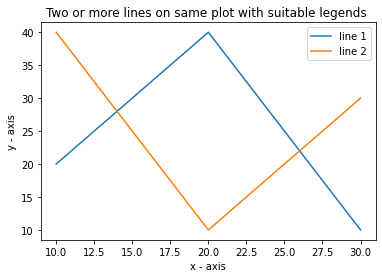

In [114]:

for idx, g in enumerate(gammas):
  
  lines = []
  for scores in scores_train_2d:

    for score in scores:
      
    plt.plot(g, s, label = "train")
  #plt.plot(g, scores_test_2d[idx], label = "test")

plt.show()

# line 1 points
x1 = [10,20,30]
y1 = [20,40,10]
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()